# Overview 
This notebook uses the final results and the results from Wes Gohn's publication to compare kaon to pion BSAs.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

%matplotlib inline

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

In [3]:
kaon_df = pd.read_csv('../results/fit/sys.csv')
pion_df = pd.read_csv('../results/wes/pip.csv')

In [4]:
kaon_df.head() 

,axis,axis_bin,axis_max,axis_min,bootstraps_0,bootstraps_1,bootstraps_2,err_0,err_1,err_2,...,sys_10_par2,sys_11_par0,sys_11_par1,sys_11_par2,sys_5_par0,sys_5_par1,sys_5_par2,sys_13_par0,sys_13_par1,sys_13_par2
0,missing_mass,0,1.510155,1.200002,[0.02225417 0.01868085 0.02430717 0.01575848 0...,[-0.20593838 -0.6251733 -0.14924845 0.701034...,[-0.00546303 0.29879084 -0.07955831 -1. ...,0.005068,0.417107,0.415341,...,0.095727,0.000345,0.122739,0.084732,0.000261,0.081840,0.031163,0.000530,0.031641,0.027360
1,missing_mass,1,1.665859,1.510155,[0.03776505 0.0436645 0.02406418 0.03907096 0...,[-0.71551317 -0.22400042 0.7214608 -0.566917...,[ 0.1075915 0.10739436 -1. 0.122527...,0.007821,0.465271,0.530635,...,0.071746,0.001366,0.051893,0.087805,0.001436,0.054398,0.046528,0.001260,0.034409,0.068812
2,missing_mass,2,1.830956,1.665859,[0.03101197 0.02944994 0.02324346 0.03308088 0...,[-1.08128265e-01 -5.35562098e-01 -5.72108090e-...,[-0.03885911 -0.9521305 0.31993136 -0.052995...,0.005587,0.409944,0.586307,...,0.016564,0.001277,0.022554,0.098250,0.000959,0.025283,0.115873,0.001376,0.015058,0.051217
3,missing_mass,3,2.005970,1.830956,[0.02259868 0.02790317 0.01437908 0.02406591 0...,[-0.62269145 -0.65569043 -0.69016474 -0.456321...,[-0.1976166 -1. 0.5478301 -0.091414...,0.006617,0.519003,0.486510,...,0.084617,0.002939,0.182898,0.186247,0.001364,0.107271,0.048370,0.001085,0.017738,0.036881
4,missing_mass,4,2.495670,2.005970,[0.01692972 0.01338771 0.022899 0.00839217 0...,[-3.2300177e-01 -7.0230949e-01 -5.7871330e-01 ...,[ 0.15275206 0.52411085 0.20496316 0.373486...,0.005037,0.496410,0.519936,...,0.008491,0.000579,0.056927,0.164260,0.000245,0.008949,0.013617,0.000686,0.094528,0.037351


In [5]:
pion_df.head()

,axis,axis_bin,axis_value,value,stat,sys
0,z,0,0.05,0.0059,0.0004,0.0004
1,z,1,0.15,0.0071,0.0009,0.0002
2,z,2,0.25,0.0070,0.0010,0.0010
3,z,3,0.35,0.0110,0.0010,0.0010
4,z,4,0.45,0.0150,0.0010,0.0010


In [6]:
print(kaon_df.columns)

Index([u'axis', u'axis_bin', u'axis_max', u'axis_min', u'bootstraps_0',
       u'bootstraps_1', u'bootstraps_2', u'err_0', u'err_1', u'err_2',
       u'par_0', u'par_1', u'par_2', u'sys_total_0', u'sys_total_1',
       u'sys_total_2', u'sys_1_par0', u'sys_1_par1', u'sys_1_par2',
       u'sys_2_par0', u'sys_2_par1', u'sys_2_par2', u'sys_3_par0',
       u'sys_3_par1', u'sys_3_par2', u'sys_4_par0', u'sys_4_par1',
       u'sys_4_par2', u'sys_12_par0', u'sys_12_par1', u'sys_12_par2',
       u'sys_6_par0', u'sys_6_par1', u'sys_6_par2', u'sys_7_par0',
       u'sys_7_par1', u'sys_7_par2', u'sys_8_par0', u'sys_8_par1',
       u'sys_8_par2', u'sys_9_par0', u'sys_9_par1', u'sys_9_par2',
       u'sys_10_par0', u'sys_10_par1', u'sys_10_par2', u'sys_11_par0',
       u'sys_11_par1', u'sys_11_par2', u'sys_5_par0', u'sys_5_par1',
       u'sys_5_par2', u'sys_13_par0', u'sys_13_par1', u'sys_13_par2'],
      dtype='object')


In [7]:
print(pion_df.columns)

Index([u'axis', u'axis_bin', u'axis_value', u'value', u'stat', u'sys'], dtype='object')


Since the kaon dataframe doesn't have the `axis_value` column, i'll quickly add it for plotting.

In [8]:
kaon_df['axis_value'] = kaon_df.axis_min + 0.5 * (kaon_df.axis_max-kaon_df.axis_min)

Some of the names in the `kaon_df` are confusing.  I will rename the important columns and drop the rest.

In [9]:
kaon_df.rename(columns={'par_0':'value', 
                        'err_0':'stat', 
                        'sys_total_0':'sys'
                       }, inplace=True)

keep_cols = pion_df.columns
drop_cols = [col for col in kaon_df.columns if col not in keep_cols]
kaon_df.drop(columns=drop_cols, inplace=True)

In [10]:
kaon_df.head()

,axis,axis_bin,stat,value,sys,axis_value
0,missing_mass,0,0.005068,0.021892,0.003459,1.355079
1,missing_mass,1,0.007821,0.035554,0.004464,1.588007
2,missing_mass,2,0.005587,0.024029,0.005866,1.748407
3,missing_mass,3,0.006617,0.021874,0.005050,1.918463
4,missing_mass,4,0.005037,0.017098,0.005970,2.250820


In [11]:
pion_axes = pion_df.axis.unique()
kaon_axes = kaon_df.axis.unique()

In [12]:
for axis in pion_axes:
    assert(axis in kaon_axes)
    
for axis in kaon_axes:
    assert(axis in pion_axes)

AssertionError: 

The datasets have the same axes.

In [13]:
axes = pion_axes 

In [14]:
add_quad = lambda x1, x2: np.sqrt(x1**2 + x2**2)

def plot_compare(pion_df, kaon_df, axis_name, ax):
    
    xlims = {
        'x' :[0.0, 0.7],
        'q2':[0.5, 5.0],
        'z' :[0.0, 1.1],
        'pt':[0.0, 1.0]
    }
    
    tex_labels = {
        'x': '$x$',
        'q2':'$Q^2 \; [GeV^2/c^2]$',
        'z': '$z_h$',
        'pt':'$P_T \; [GeV/c]$'
    }
    
    ax.errorbar(pion_df[pion_df.axis == axis_name].axis_value, 
                    pion_df[pion_df.axis == axis_name].value,
                    add_quad(pion_df[pion_df.axis == axis_name].stat, pion_df[pion_df.axis == axis_name].sys),
                   linestyle='', marker='o', label='E1-F $\pi^+$ (Gohn 2014)',
               color='black')
    ax.errorbar(kaon_df[kaon_df.axis == axis_name].axis_value, 
                    kaon_df[kaon_df.axis == axis_name].value,
                    add_quad(kaon_df[kaon_df.axis == axis_name].stat, kaon_df[kaon_df.axis == axis_name].sys), 
                   linestyle='', marker='v', label='E1-F $K^+$',
               color='red')
    ax.set_ylim([-0.01, 0.08])
    ax.set_xlim(xlims[axis_name])
    ax.set_xlabel(tex_labels[axis_name])
    ax.legend(frameon=False)
    
def plot_pions(pion_df, axis_name, ax):
    
    xlims = {
        'x' :[0.0, 0.7],
        'q2':[0.5, 5.0],
        'z' :[0.0, 1.1],
        'pt':[0.0, 1.0]
    }
    
    tex_labels = {
        'x': '$x$',
        'q2':'$Q^2 \; [GeV^2/c^2]$',
        'z': '$z$',
        'pt':'$P_T \; [GeV/c]$'
    }
    
    ax.errorbar(pion_df[pion_df.axis == axis_name].axis_value, 
                    pion_df[pion_df.axis == axis_name].value,
                    add_quad(pion_df[pion_df.axis == axis_name].stat, pion_df[pion_df.axis == axis_name].sys),
                   linestyle='', marker='o', label='E1-F $\pi^+$ (Gohn 2014)',
               color='black')
    ax.axhline(0.0, color='black', linestyle='--', linewidth=1)
    ax.set_ylim([-0.01, 0.08])
    ax.set_xlim(xlims[axis_name])
    ax.set_xlabel(tex_labels[axis_name])
    ax.legend(frameon=False)

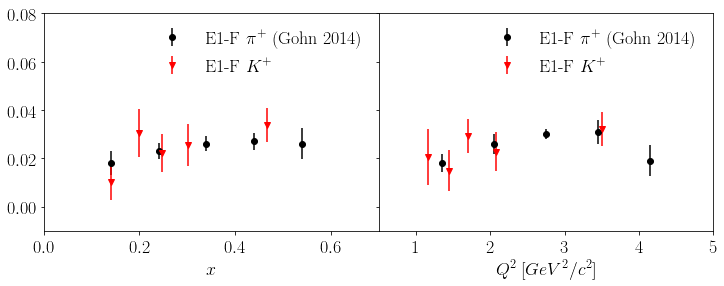

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)
fig.subplots_adjust(wspace=0)
plot_compare(pion_df, kaon_df, 'x', axs[0])
plot_compare(pion_df, kaon_df, 'q2', axs[1])

fig.savefig('../image/compare-pion-xq2.pdf', bbox_inches='tight')

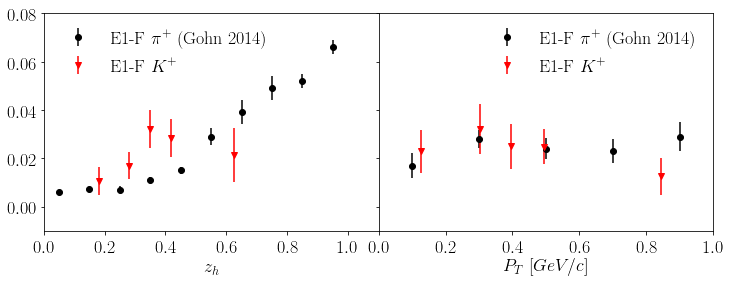

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)
fig.subplots_adjust(wspace=0)
plot_compare(pion_df, kaon_df, 'z', axs[0])
plot_compare(pion_df, kaon_df, 'pt', axs[1])

fig.savefig('../image/compare-pion-zpt.pdf', bbox_inches='tight')

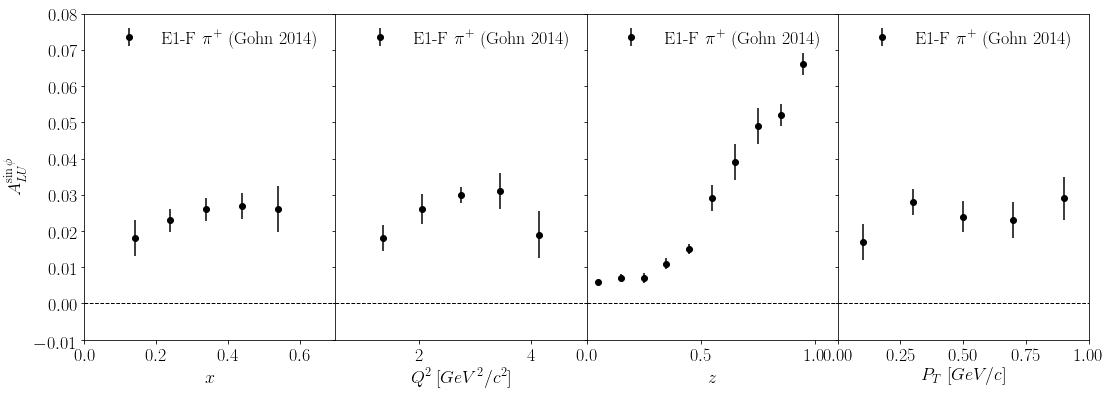

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(18,6), sharey=True)
fig.subplots_adjust(wspace=0)

plot_pions(pion_df, 'x', axs[0])
plot_pions(pion_df, 'q2', axs[1])
plot_pions(pion_df, 'z', axs[2])
plot_pions(pion_df, 'pt', axs[3])

axs[0].set_ylabel('$A_{LU}^{\sin\phi}$')

fig.savefig('../image/compare-pion-zpt.pdf', bbox_inches='tight')